In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


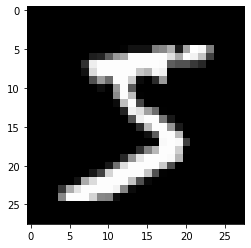

In [4]:
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

In [5]:
image_height, image_width = 28,28
x_train = x_train.reshape(60000, image_height*image_width)
x_test = x_test.reshape(10000, image_height*image_width)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [7]:
y_train = to_categorical(y_train, 10)
print(y_train.shape)
y_test = to_categorical(y_test, 10)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape= (784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
print(784*512+512)
print(512*512+512)
print(512*10+10)

401920
262656
5130


In [11]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1834 - accuracy: 0.9443 - val_loss: 0.0938 - val_accuracy: 0.9701
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0824 - accuracy: 0.9746 - val_loss: 0.0935 - val_accuracy: 0.9710
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0561 - accuracy: 0.9822 - val_loss: 0.0875 - val_accuracy: 0.9748
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0903 - val_accuracy: 0.9764
Epoch 5/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0882 - val_accuracy: 0.9753
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0870 - val_accuracy: 0.9807
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0910 - val_accuracy:

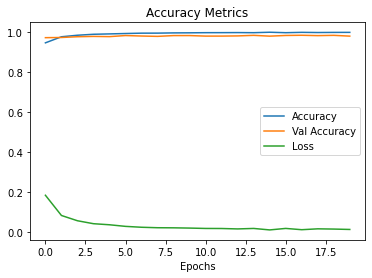

In [12]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Accuracy Metrics')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [13]:
score = model.evaluate(x_test, y_test)
print(score)

313/313 [==============================] - 0s 1ms/step - loss: 0.1853 - accuracy: 0.9778
[0.1852703094482422, 0.9778000116348267]
